In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.sparse import csr_matrix
import gzip
from dask import dataframe as dd

## Read in data using H5py and see all the keys and underlying contents

In [2]:
mtg_rna = h5py.File('../../AD_data/SEA_AD/MTG/RNAseq/SEAAD_MTG_RNAseq_final-nuclei.2023-05-05.h5ad')
mtg_rna.keys()

<KeysViewHDF5 ['X', 'layers', 'obs', 'obsm', 'obsp', 'uns', 'var']>

In [3]:
mtg_rna.get('X').keys()

<KeysViewHDF5 ['data', 'indices', 'indptr']>

In [4]:
mtg_rna.get('layers').get('UMIs').keys()

<KeysViewHDF5 ['data', 'indices', 'indptr']>

In [5]:
mtg_rna.get('obsm').keys()

<KeysViewHDF5 ['X_scVI', 'X_umap']>

In [6]:
mtg_rna.get('uns').keys()

<KeysViewHDF5 ['APOE4 Status_colors', 'Braak_colors', 'CERAD score_colors', 'Cognitive Status_colors', 'Great Apes Metadata', 'Highest Lewy Body Disease_colors', 'LATE_colors', 'Overall AD neuropathological Change_colors', 'Sex_colors', 'Subclass_colors', 'Supertype_colors', 'Thal_colors', 'UW Clinical Metadata', 'X_normalization', 'batch_condition', 'default_embedding', 'neighbors', 'title', 'umap']>

In [7]:
mtg_rna.get('var').keys()

<KeysViewHDF5 ['_index', 'gene_ids']>

In [8]:
list(mtg_rna.get('obs').keys())

['APOE4 Status',
 'ATAC_Confidently_mapped_read_pairs',
 'ATAC_Fraction_of_genome_in_peaks',
 'ATAC_Fraction_of_high_quality_fragments_in_cells',
 'ATAC_Fraction_of_high_quality_fragments_overlapping_TSS',
 'ATAC_Fraction_of_high_quality_fragments_overlapping_peaks',
 'ATAC_Fraction_of_transposition_events_in_peaks_in_cells',
 'ATAC_Mean_raw_read_pairs_per_cell',
 'ATAC_Median_high_quality_fragments_per_cell',
 'ATAC_Non-nuclear_read_pairs',
 'ATAC_Number_of_peaks',
 'ATAC_Percent_duplicates',
 'ATAC_Q30_bases_in_barcode',
 'ATAC_Q30_bases_in_read_1',
 'ATAC_Q30_bases_in_read_2',
 'ATAC_Q30_bases_in_sample_index_i1',
 'ATAC_Sequenced_read_pairs',
 'ATAC_TSS_enrichment_score',
 'ATAC_Unmapped_read_pairs',
 'ATAC_Valid_barcodes',
 'Age at Death',
 'Arteriolosclerosis',
 'Atherosclerosis',
 'Braak',
 'Brain Region',
 'Brain pH',
 'CERAD score',
 'Class',
 'Class confidence',
 'Cognitive Status',
 'Continuous Pseudo-progression Score',
 'Donor ID',
 'Doublet score',
 'Fraction mitochondria

## The cell-types and other metadata aassociated with each cell and sample

In [9]:
cell_prep_type = mtg_rna.get('obs').get('cell_prep_type')
cell_prep_type = pd.DataFrame(data=cell_prep_type)
Class = mtg_rna.get('obs').get('Class')
Class = pd.DataFrame(data=Class)
subclass = mtg_rna.get('obs').get('Subclass')
subclass = pd.DataFrame(data=subclass)
brain_region = mtg_rna.get('obs').get('Brain Region')
brain_region = pd.DataFrame(data=brain_region)
categories = mtg_rna.get('obs').get('__categories')
categories = pd.DataFrame(data=categories)

In [10]:
subclass

,0
0,20
1,12
2,9
3,17
4,20
...,...
1378206,9
1378207,9
1378208,20
1378209,11


In [11]:
subclass_cat = mtg_rna.get('obs').get('__categories').get('Subclass')
subclass_cat = pd.DataFrame(data=subclass_cat)
subclass_cat = subclass_cat.iloc[:,0].apply(lambda s: s.decode('utf-8'))
subclass_cat

0          Lamp5 Lhx6
1               Lamp5
2                Pax6
3                Sncg
4                 Vip
5           Sst Chodl
6                 Sst
7               Pvalb
8          Chandelier
9             L2/3 IT
10              L6 IT
11              L4 IT
12              L5 IT
13              L5 ET
14              L6 CT
15                L6b
16         L6 IT Car3
17            L5/6 NP
18          Astrocyte
19                OPC
20    Oligodendrocyte
21        Endothelial
22               VLMC
23      Microglia-PVM
Name: 0, dtype: object

In [12]:
braak = mtg_rna.get('obs').get('Braak')
braak = pd.DataFrame(data=braak)
braak_categories = mtg_rna.get('obs').get('__categories').get('Braak')
braak_categories = pd.DataFrame(data=braak_categories)
braak_categories = braak_categories.iloc[:,0].apply(lambda s: s.decode('utf-8'))

In [13]:
braak

,0
0,4
1,5
2,4
3,4
4,6
...,...
1378206,4
1378207,5
1378208,3
1378209,4


In [14]:
braak_categories

0    Reference
1      Braak 0
2     Braak II
3    Braak III
4     Braak IV
5      Braak V
6     Braak VI
Name: 0, dtype: object

## Donor ID for each cell

In [15]:
donor_id = mtg_rna.get('obs').get('Donor ID')
donor_id = pd. DataFrame(data=donor_id)
donor_id

,0
0,30
1,75
2,13
3,56
4,29
...,...
1378206,64
1378207,67
1378208,11
1378209,53


## All the hidden categories

In [16]:
categories.iloc[0:60,0]

0                                          APOE4 Status
1                                          Age at Death
2                                    Arteriolosclerosis
3                                       Atherosclerosis
4                                                 Braak
5                                          Brain Region
6                                              Brain pH
7                                           CERAD score
8                                                 Class
9                                      Cognitive Status
10                                             Donor ID
11                                   Fresh Brain Weight
12                                               Gender
13                                               Genome
14                            Highest Lewy Body Disease
15                           Highest level of education
16                                             Hispanic
17                    Interval from last CASI in

In [17]:
categories.iloc[60:,0]

60    rna_amplification_pass_fail
61                    sample_name
62             specify other race
Name: 0, dtype: object

## Reduce representations of the data

In [18]:
X_scvi = mtg_rna.get('obsm').get('X_scVI')
X_umap = mtg_rna.get('obsm').get('X_umap')
X_scvi = pd.DataFrame(data=X_scvi)
X_umap = pd.DataFrame(data=X_umap)

In [19]:
X_scvi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.027106,0.698614,-1.353345,-0.597451,-0.619398,0.831723,-0.819715,-0.135807,1.165330,-0.533898,-1.763904,0.297857,-0.192814,1.220392,0.744705,-1.261555,-0.060014,0.492368,-0.148011,-0.160856
1,-0.969393,-1.652711,-0.140260,0.797619,-2.233307,-0.691485,0.333146,0.967864,-1.240105,0.829085,-2.499836,-3.067173,1.408871,1.200159,0.816906,0.426851,-0.263828,-2.428107,0.144745,1.074235
2,0.638351,-1.126229,1.300591,1.057289,-0.554248,-0.601467,-0.552929,0.002447,2.447047,1.635807,0.999726,-1.197686,0.685836,-0.184931,1.697181,1.119739,-1.365324,1.808707,-0.093848,0.527784
3,-0.278161,-0.517570,0.339013,-0.903170,-2.281305,-0.035991,-0.651971,-1.120946,0.736014,-0.052497,-0.676760,-1.169442,-1.074534,0.021484,-0.176420,2.382935,0.793396,-1.433841,-2.058723,2.215209
4,-0.970590,1.082500,-1.627025,-0.548828,-0.622542,1.220099,-1.300437,-0.276280,1.137610,-2.273913,-1.123910,1.387637,-0.058860,1.506119,-0.351381,-1.322799,-0.512780,-0.222475,1.160798,0.096138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378206,-0.567254,-1.315838,-0.757829,0.175219,-0.247883,0.414340,0.254362,0.467260,-0.121558,1.926495,-3.141425,1.730416,1.673390,-0.131467,0.147619,0.992856,-0.514649,-0.588267,-0.336150,-0.043429
1378207,-1.248705,-1.898495,-0.176328,-0.624121,1.253515,-1.272985,0.279909,1.374706,-0.988508,2.258581,-1.723185,0.319415,-0.351999,-1.217218,-0.028370,0.312025,-1.881534,-0.130105,-1.252263,-1.115234
1378208,-0.032313,1.663280,-1.918703,-0.687156,-0.237924,1.036288,-1.517288,0.545578,0.902072,-0.533370,-0.189528,1.604082,0.278114,1.290554,-0.495183,-2.162446,-0.289098,-0.317002,1.329087,-0.466315
1378209,0.493645,-0.223097,1.179964,0.816063,-0.911766,-2.006849,0.530207,-1.689107,1.436010,0.701115,0.182986,0.207932,2.159522,0.922341,1.290462,-0.284271,-0.735029,0.775204,0.319028,-0.681585


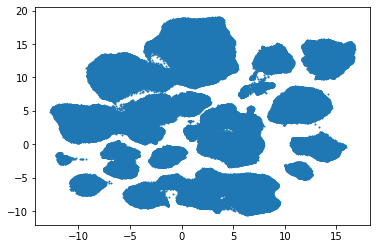

In [20]:
plt.scatter(X_umap.iloc[:,0],X_umap.iloc[:,1],s=1)

## Gene IDs and names

In [21]:
gene_id = mtg_rna.get('var').get('gene_ids')
index = mtg_rna.get('var').get('_index')
gene_id = pd.DataFrame(data=gene_id,columns=['gids'])
gene_id=gene_id.iloc[:,0].apply(lambda s: s.decode('utf-8'))
index = pd.DataFrame(data=index)
index=index.iloc[:,0].apply(lambda s: s.decode('utf-8'))
gene_id

0        MIR1302-2HG
1            FAM138A
2              OR4F5
3         AL627309.1
4         AL627309.3
            ...     
36596     AC141272.1
36597     AC023491.2
36598     AC007325.1
36599     AC007325.4
36600     AC007325.2
Name: gids, Length: 36601, dtype: object

## Extract samples from different Braak stages

In [22]:
ref = list(np.where(braak.iloc[:,0]==0)[0])
br_5 = list(np.where(braak.iloc[:,0]==5)[0])
br_6 = list(np.where(braak.iloc[:,0]==6)[0])

## No. of samples in respective Braak stages

In [23]:
len(pd.unique(donor_id.iloc[ref,0]))

5

In [24]:
len(pd.unique(donor_id.iloc[br_6,0]))

15

In [25]:
len(pd.unique(donor_id.iloc[br_5+br_6,0]))

49

## Extract counts data

In [26]:
data = mtg_rna.get('layers').get("UMIs").get('data')
indices = mtg_rna.get('layers').get("UMIs").get('indices')
indptr = mtg_rna.get('layers').get("UMIs").get('indptr')

## Covert the data to CSR array in Python's sparse format

In [27]:
data_array=csr_matrix((data, indices, indptr))

## Extract counts of reference/control samples

In [28]:
counts_ref = pd.DataFrame(data=data_array[ref].toarray())

## See distribution of genes and cells in reference samples

Text(0, 0.5, 'No. of Cells')

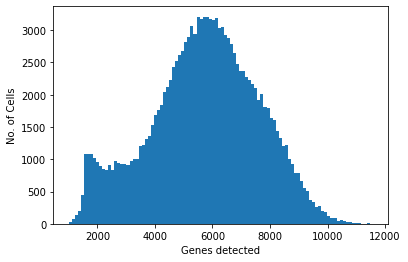

In [29]:
fig=plt.hist(np.count_nonzero(counts_ref,axis=1),bins=100)
plt.xlabel('Genes detected')
plt.ylabel('No. of Cells')

Text(0, 0.5, 'No. of genes')

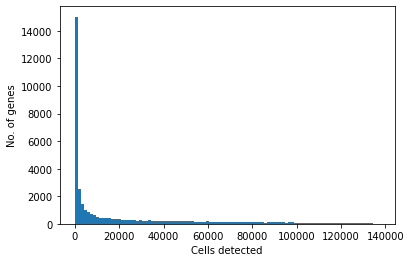

In [30]:
fig=plt.hist(np.count_nonzero(counts_ref,axis=0),bins=100)
plt.xlabel('Cells detected')
plt.ylabel('No. of genes')

## Extract samples of Braak 6 stage

In [31]:
counts_br6 = pd.DataFrame(data=data_array[br_6].toarray())

## See distribution of genes and samples in Braak 6 samples

Text(0, 0.5, 'No. of Cells')

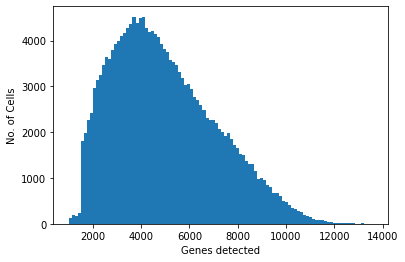

In [32]:
fig=plt.hist(np.count_nonzero(counts_br6,axis=1),bins=100)
plt.xlabel('Genes detected')
plt.ylabel('No. of Cells')

Text(0, 0.5, 'No. of genes')

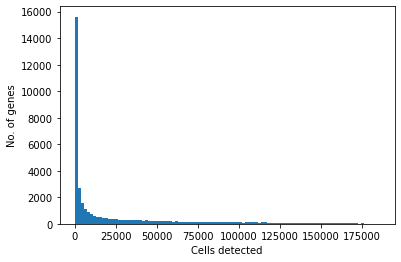

In [33]:
fig=plt.hist(np.count_nonzero(counts_br6,axis=0),bins=100)
plt.xlabel('Cells detected')
plt.ylabel('No. of genes')

## The pre-processing to remove noisy cells and genes is perhaps already done. The h5ad file read at the beginning is likely already refined